<a href="https://colab.research.google.com/github/kjfms/NIA-Project/blob/main/Code/%EC%9E%A5%ED%9D%A5%EA%B5%B0%EC%B2%AD_%EB%B3%B4%EA%B1%B4%EC%86%8C_%EB%AF%BC%EC%9B%90%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 코랩에서 한글 깨질 때 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,727 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import gensim

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NIA/11월/청구서전체현황(2020-01-01_2020-12-31).csv',encoding = 'utf-8')

In [ ]:
data[data['청구인'] == '윤은주']

,접수번호,접수일,청구인,구분,청구제목,청구내용,공개방법,처리부서,결정구분,공개내용,비공개(부분 공개)내용 및 사유,비공개사유,결정통지일,공개일,공개형태,교부방법,처리상태,청구방법,처리자,처리기한,처리완료일자,처리기간,부존재사유,연장통지일자,다중처리여부,수수료 감면 신청여부,수수료 감면 사유,수수료금액,수수료납부여부,수수료납부형태
305,7151333,2020.10.08,윤은주,개인(내국인),한국.다른나라 국가 수사 기관 들에 알리고.체포.강한 경고.처벌 들을 원하는.서울....,\n한국 . 다른 나라 . 국가 . 수사 . 기관 . 들에 . 알리고 . 체포 요청...,전자파일,전라남도 장흥군 민원봉사과,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종결처리,온라인,김혜진,2020.10.22,2020.10.12,2일,NaN,NaN,NaN,N,NaN,0,NaN,NaN
670,6912108,2020.07.03,윤은주,개인(내국인),2018년도.1월.10월.최근에저를먼저이유없이같이괴롭힌.원밀리언낸스학원.윤여욱.jy...,"1993년생,서울신구초등학교서울압구정중학교서울압구정고등학교들을졸업한.윤은주.라고합니...",전자파일,전라남도 장흥군 민원봉사과,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종결처리,온라인,최승호,2020.07.17,2020.07.06,0일,NaN,NaN,NaN,N,NaN,0,NaN,NaN
700,6895176,2020.06.29,윤은주,개인(내국인),"제가.17살.20살.2018년도1월,10월,최근에.저를.먼저이유없이괴롭힌서울동작구김...","제가17살,20살,2018년도 1월부터 저랑서로모르고저랑서로연락들을안했었고저랑서로안...",전자파일,전라남도 장흥군 민원봉사과,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종결처리,온라인,최승호,2020.07.13,2020.06.30,0일,NaN,NaN,NaN,N,NaN,0,NaN,NaN
701,6893143,2020.06.29,윤은주,개인(내국인),"제가17살.20살.2018년도1월,10월,최근에.저를.먼저이유없이괴롭힌서울동작구김병...","제가17살,20살,2018년도 1월부터 저랑서로모르고저랑서로연락들을안했었고저랑서로안...",전자파일,전라남도 장흥군 민원봉사과,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종결처리,온라인,최승호,2020.07.13,2020.06.30,0일,NaN,NaN,NaN,N,NaN,0,NaN,NaN
702,6891691,2020.06.29,윤은주,개인(내국인),제가아주어렸을때6살.20살.2018년도.1월.10월.부터저를먼저이유없이폭력욕설협박들...,"제가17살,20살,2018년도 1월부터 저랑서로모르고저랑서로연락들을안했었고저랑서로안...",전자파일,전라남도 장흥군 민원봉사과,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종결처리,온라인,최승호,2020.07.13,2020.06.29,0일,NaN,NaN,NaN,N,NaN,0,NaN,NaN
703,6890283,2020.06.29,윤은주,개인(내국인),"제가17살.20살.2018년도1월,10월,최근에저를먼저이유없이괴롭힌서울동작구김병기....","제가17살,20살,2018년도 1월부터 저랑서로모르고저랑서로연락들을안했었고저랑서로안...",전자파일,전라남도 장흥군 민원봉사과,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종결처리,온라인,최승호,2020.07.13,2020.06.29,0일,NaN,NaN,NaN,N,NaN,0,NaN,NaN
977,6745153,2020.05.08,윤은주,개인(내국인),"한국,다른나라,국가,수사기관들에 알리고,한국,다른나라 국가,수사기관들로부터 보호들을...","서울 신구 초등학교,서울압구정중학교 서울압구정고등학교 들을 졸업 한 , 윤은주 , ...",전자파일,전라남도 장흥군 민원봉사과,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종결처리,온라인,최승호,2020.05.22,2020.05.11,0일,NaN,NaN,NaN,N,NaN,0,NaN,NaN
978,6742052,2020.05.08,윤은주,개인(내국인),"한국,다른나라 국가,수사기관들에 강한경고,강한처벌들을 원하는 , 저의 괴롭힌 상황 ...","서울 신구 초등학교,서울압구정중학교 서울압구정고등학교 들을 졸업 한 , 윤은주 , ...",전자파일,전라남도 장흥군 민원봉사과,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종결처리,온라인,최승호,2020.05.21,2020.05.11,0일,NaN,NaN,NaN,N,NaN,0,NaN,NaN
979,6740586,2020.05.08,윤은주,개인(내국인),"한국,다른나라 국가,수사기관들에 강한경고,강한처벌들을 원하는 저를 먼저 이유없이 괴...","서울 신구 초등학교,서울압구정중학교 서울압구정고등학교 들을 졸업 한 , 윤은주 , ...",전자파일,전라남도 장흥군 민원봉사과,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종결처리,온라인,최승호,2020.05.21,2020.05.11,0일,NaN,NaN,NaN,N,NaN,0,NaN,NaN
982,6729604,2020.05.07,윤은주,개인(내국인),"한국,다른나라,국가,수사기관들에강한경고,강한처벌들을원하는,jyp,yg,sm,여자,남...","1993 년 생 , 서울 신구 초등 학교 서울 압구정 중 학교 서울 압구정 고등 학...",전자파일,전라남도 장흥군 민원봉사과,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종결처리,온라인,최승호,2020.05.21,2020.05.08,0일,NaN,NaN,NaN,N,NaN,0,NaN,NaN


## 변수전처리

In [ ]:
data['접수일'] = pd.to_datetime(data['접수일'],format = '%Y-%m-%d')
data['처리기한'] = pd.to_datetime(data['처리기한'],format = '%Y-%m-%d')
data['처리완료일자'] = pd.to_datetime(data['처리완료일자'],format = '%Y-%m-%d')
data['공개일'] = pd.to_datetime(data['공개일'],format = '%Y-%m-%d')

In [ ]:
# 결측값에 공백넣기 : 명사추출때 코드 돌아가게 하기 위해서
data.fillna({'처리부서':' ','공개내용' : ' '},inplace=True)

In [ ]:
# 부서명 추출
for i in range(len(data)):
  if data.loc[i,'처리부서'] == ' ':
    data.loc[i,'부서명'] = np.nan
  else:
    data.loc[i,'부서명'] = data.loc[i,'처리부서'].split(' ')[2]

In [ ]:
data['부서명'].value_counts()

보건소       325
민원봉사과     311
환경관리과     220
주민복지과      84
문화관광과      83
기획홍보실      82
건설도시과      78
총무과        66
재난안전과      65
해양수산과      50
지역경제과      43
재무과        41
산림휴양과      38
수도사업소      30
의회사무과      24
스포츠산업단     20
축산사업소      15
농산과        14
농업기술센터      4
안양면         3
미래혁신과       2
대덕읍         2
장평면         2
장흥읍         2
관산읍         1
부산면         1
Name: 부서명, dtype: int64

## 전체 데이터 집계

In [ ]:
data.head(1)

,접수번호,접수일,청구인,구분,청구제목,청구내용,공개방법,처리부서,결정구분,공개내용,비공개(부분 공개)내용 및 사유,비공개사유,결정통지일,공개일,공개형태,교부방법,처리상태,청구방법,처리자,처리기한,처리완료일자,처리기간,부존재사유,연장통지일자,다중처리여부,수수료 감면 신청여부,수수료 감면 사유,수수료금액,수수료납부여부,수수료납부형태,부서명
0,7367113,2020-12-31,김슬기,개인(내국인),2020년 12월 신규 일반 음식점 현황요청합니다.(빠른처리부탁드립니다),"2020년 12월에 영업을 시작한 일반 음식점의 \n\n- 연번(개수), 업소명, ...",전자파일,전라남도 장흥군 보건소,공개,2020년 12월에 영업을 시작한 일반음식점 현황을 붙임과 같이 공개합니다.,NaN,NaN,2021.01.11,2021-01-11,전자파일,정보통신망,공개완료,온라인,위예지,2021-01-14,2021-01-11,7일,NaN,NaN,NaN,N,NaN,0,Y,NaN,보건소


In [ ]:
# 접수일 월추출
data['접수월'] = data['접수일'].dt.month
# 처리완료일자 월추출
data['처리완료월'] = data['처리완료일자'].dt.month
# 공개일 월추출
data['공개월'] = data['공개일'].dt.month

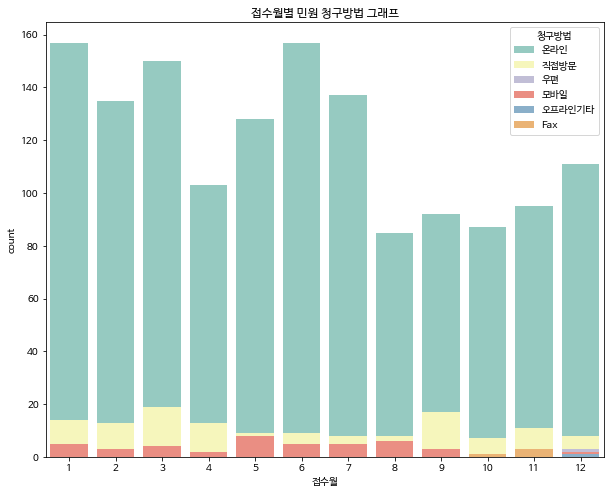

In [ ]:
# 접수월 별 청구방법 bar-plot
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (10,8))
sns.countplot(x = '접수월',hue = '청구방법', data = data, dodge = False , palette = 'Set3')
plt.title('접수월별 민원 청구방법 그래프')
plt.show()

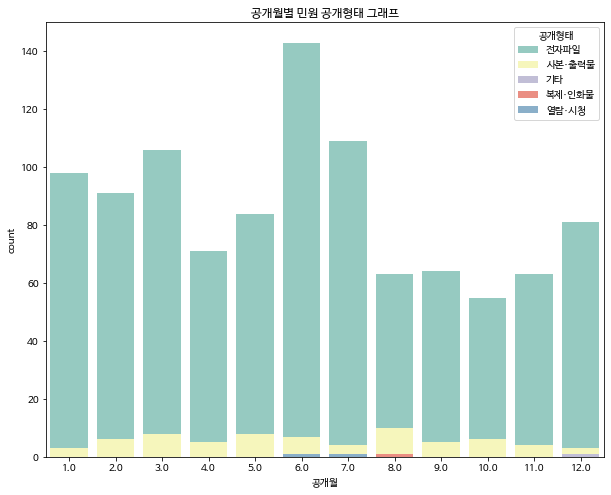

In [ ]:
# 공개월 별 공개형태 bar-plot
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (10,8))
sns.countplot(x = '공개월',hue = '공개형태', data = data, dodge = False , palette = 'Set3')
plt.title('공개월별 민원 공개형태 그래프')
plt.show()

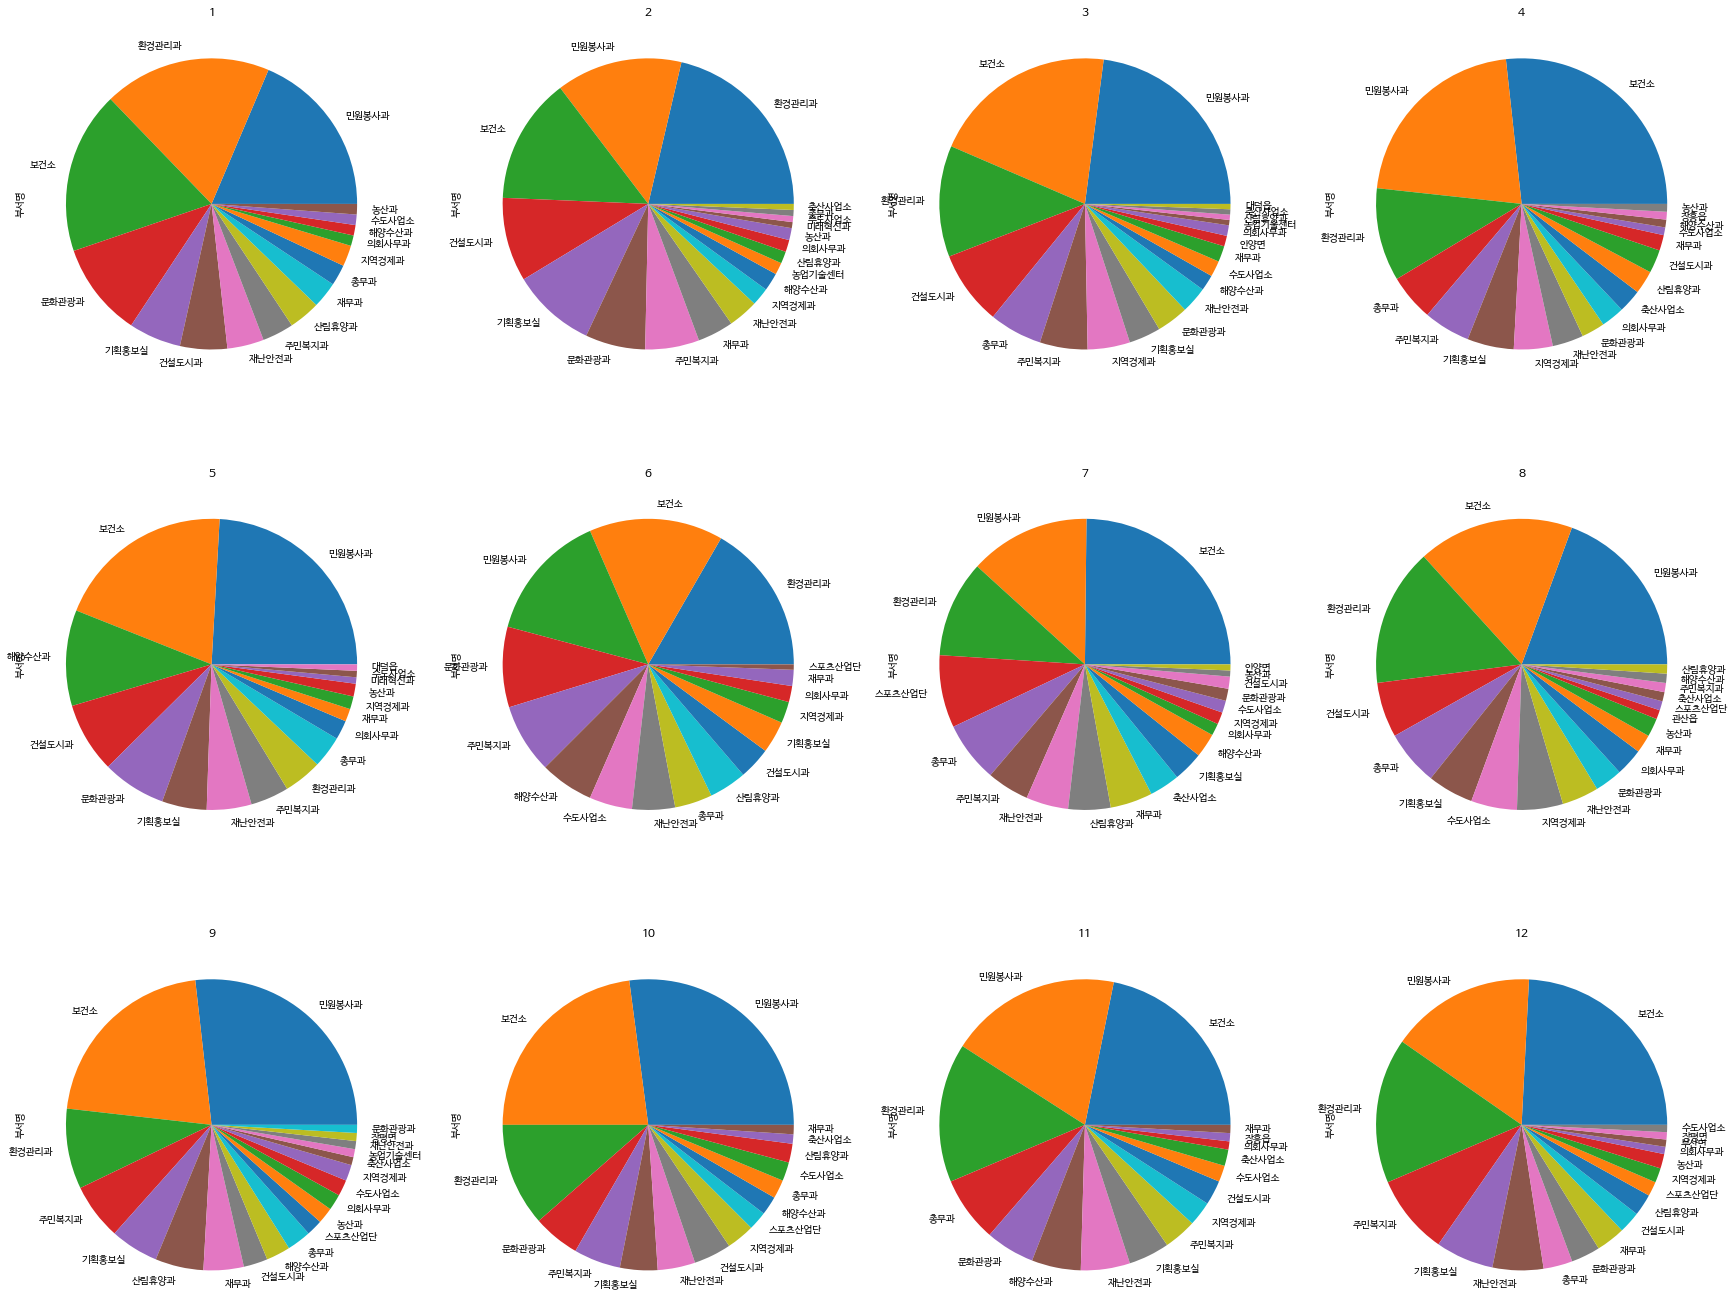

In [ ]:
# 접수월 별 담당부서 bar-plot
plt.figure(figsize = (30,24))
plt.rc('font', family='NanumBarunGothic')

for i in range(0,12):
  plt.subplot(3,4,i+1)
  pie = data[data['접수월'] == i+1]['부서명'].value_counts()
  pie.plot(kind = 'pie')
  plt.spring()
  plt.xticks(rotation = 70)
  plt.title(i+1)
plt.show()

## Konlpy 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
!apt-get update !apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-16.0.2"

E: The update command takes no arguments
     |████████████████████████████████| 88 kB 4.5 MB/s 
  Created wheel for JPype1-py3: filename=JPype1_py3-0.5.5.4-cp37-cp37m-linux_x86_64.whl size=2681477 sha256=09df52307baa1ab6d3e744fcfaed88b79ec099e586c2a30dde55a2e48e562237
  Stored in directory: /root/.cache/pip/wheels/e7/d1/09/f55dca0203b0691945bdf0f63d486a0b4d4e5ec4bd78a2502e
Successfully built JPype1-py3
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 33.9 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Rel

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   954k      0  0:00:01  0:00:01 --:--:-- 1940k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

from matplotlib import font_manager, rc
import matplotlib.font_manager as fm 
from wordcloud import WordCloud

from collections import Counter

In [ ]:
mecab = Mecab()
okt = Okt()

## 보건소에 해당하는 행만 추출

In [ ]:
# 총 325개
data2 = data[data['부서명'] == '보건소']

In [ ]:
data2.reset_index(drop = True, inplace = True)

## 학습용 데이터 생성

In [ ]:
# 첨부파일이 있는 민원들의 접수번호
contents_null = [6343850,6342663,6347859,6361980, 6360414,6365844,6370809,6376187, 6376127,6375886,6392497, 6408176 ,6411220 ,6424017 ,6423993, 6421206, 6429766, 6433720, 6433613, 6470149,
6477407, 6482634,6486872,6486866,6484838,6496572,6501522,6501474,6504238,6513102,6511367,6511128,6521753,6511115,6533115,6552564, 6564301,6563158, 6568608, 6580512, 6587557, 6592447, 6599511,
6599500, 6599471, 6597479, 6597189, 6645357, 6645357, 6659233, 6663445, 6662997, 6671311, 6670436, 6678598, 6682150, 6696458, 6699212, 6703218, 6717327, 6724342, 6756529, 6772665, 6794693,
6793919, 6817680, 6822431, 6821205, 6833506, 6839221, 6838795, 6843988, 6855427, 6869560, 6907249, 6936585, 7148167, 7288599, 7290360]

In [ ]:
sentence = []

for i in range(len(data2)):
  if data2.loc[i,'접수번호'] in contents_null: # 첨부파일이 있는 민원인 경우
    contents = data2.loc[i,'공개내용'] # 공개내용 가져옴
    title = '' # 타이틀은 안가져옴
  
  else: # 첨부파일이 없는 민원인 경우
    contents = data2.loc[i,'청구내용'] # 청구내용 가져옴
    title = data2.loc[i,'청구제목'] # 청구제목 가져옴

  sentence.append([c for c in okt.nouns(contents) if len(c) >=2 ])
  sentence.append([t for t in okt.nouns(title) if len(t) >=2 ])

In [ ]:
sentence[:5]

[['영업',
  '시작',
  '일반',
  '음식점',
  '개수',
  '소명',
  '소재지',
  '주소',
  '소재지',
  '전화',
  '영업',
  '작일',
  '이전',
  '업체',
  '오픈',
  '신규',
  '업체',
  '자료',
  '요청',
  '가게',
  '양도',
  '포함',
  '영업',
  '작일',
  '기준',
  '오름',
  '차순',
  '정리',
  '양도',
  '업체',
  '파일',
  '정리',
  '주시',
  '모두',
  '활성화',
  '홈페이지',
  '공개',
  '자료',
  '링크',
  '정리',
  '감사',
  '자료',
  '수집',
  '요청',
  '수고'],
 ['신규', '일반', '음식점', '현황', '요청', '처리'],
 ['정보',
  '정보공개',
  '신청',
  '청구',
  '관할',
  '구역',
  '미신',
  '건강',
  '기능',
  '식품',
  '대한',
  '상금',
  '정보공개',
  '청구',
  '예산',
  '금액',
  '포상',
  '금액',
  '관할',
  '주거지역',
  '신고',
  '상금',
  '지급',
  '정보공개',
  '청구'],
 ['건강', '기능', '식품', '정보공개', '청구'],
 ['관내',
  '현재',
  '영업',
  '미용',
  '업체',
  '업종',
  '업태',
  '허가',
  '상호',
  '대표자',
  '연락처',
  '면적',
  '좌석',
  '우편번호',
  '주소',
  '정보',
  '공개',
  '요청',
  '하나',
  '메일',
  '전송',
  '부탁',
  '정보',
  '장시',
  '개인',
  '인증',
  '다시',
  '시기']]

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
nouns_df = pd.DataFrame({'nouns' : sentence})

### 1. stopwords 없이

In [ ]:
tfidf_vectorizer1 = TfidfVectorizer(analyzer='word',
                             lowercase=False,
                             tokenizer=None,
                             preprocessor=None,
                             min_df=5, # 최소 문서 수 5건
                             ngram_range=(1,1), #Bigram : ngram_range=(1,2)
                             smooth_idf=True,
                             )

In [ ]:
tfidf_vector = tfidf_vectorizer1.fit_transform(nouns_df['nouns'].astype('str')) # tf-idf값으로 채워진 DTM생성
tfidf_scores = tfidf_vector.toarray().sum(axis = 0)
tfidf_idx = np.argsort(-tfidf_scores) # 1차원 배열 거꾸로 정렬 의미
tfidf_scores = tfidf_scores[tfidf_idx] # 인덱스
tfidf_vocab = np.array(tfidf_vectorizer1.get_feature_names())[tfidf_idx] # 인덱스에 해당하는 단어 추출


In [ ]:
tfidf_df = pd.DataFrame({'단어' : tfidf_vocab, '점수' : tfidf_scores})

#### 워드클라우드

In [ ]:
tfidf_dict = {}

for i in range(len(tfidf_df)):
  tfidf_dict[tfidf_df.loc[i,'단어']] = tfidf_df.loc[i,'점수']

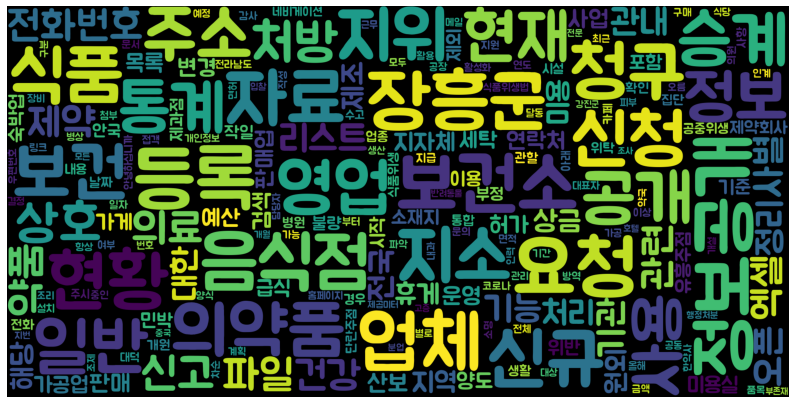

In [ ]:
plt.figure(figsize = (14,10))
plt.rc('font', family='NanumBarunGothic')

wordcloud = WordCloud(font_path = '/content/drive/MyDrive/Colab Notebooks/졸업논문/BMJUA_TTF.TTF',relative_scaling = 0.2,
                      background_color = 'black', width = 2000,
                      height = 1000,  max_font_size = 200).generate_from_frequencies(tfidf_dict)

plt.imshow(wordcloud)
plt.axis('off')
# plt.title('skip-gram으로 연관성 높은 상위 50개 단어 삭제 후 워드클라우드 ')
plt.show()

### 2. 불용어처리 후

In [ ]:
stopwords = ['아래', '상상', '제안', '까지', '닷컴', '포털', '사이트', '천만', '오아시스', '이벤트', '접수','서울시','서울','특별시',
             '천만상상','파일','첨부','응모','슬로건','공모','공모전','응모전','신청','경우','때문','정도','사항',
                   '해당','겁니다','이것','저것','그것','돋움','신명', '태명', '한컴', '돋움',
                   '동안','거기','저기','여기','대부분','누구','무엇','고딕','만큼','굴림','감사','건지','텐데',
                   '안녕','이번','걸로','수고','겁니까','그간','그건','그때','글쓴이','누가','니다','다면',
                   '뭔가','상상오아시스','하다','이다','되다','같다','궁','자체','서체','정','서','이','을','있다','없다', '체','관련',
                   '생각', '현재', '진행', '사람', '마음', '남산', '내용', '현실','음','막','김','변','조',
                   '오','참','동','지금','주변','대상','부분','요즘','하루','마련','세대','시간','이상','행위',
                   '활동','구분','사실','과정','모습','기간','선정','단지','자신','발생','지역','기대','마련',
                   '장소','모두','부탁','제공','이용','해주','당시','최근','민원','문제','문제점','현황','개선','방안',
                   '문의','답변','일동','요청','담당자','직원','방법','사용','활용','확인','방식','예전']

stopwords.append('자료')
stopwords.append('정보')
stopwords.append('공개')
stopwords.append('청구')
stopwords.append('정보공개')


In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(analyzer='word',
                             lowercase=False,
                             tokenizer=None,
                             preprocessor=None,
                             min_df=5, # 최소 문서 수 5건
                             ngram_range=(1,1), #Bigram : ngram_range=(1,2)
                             smooth_idf=True,
                             stop_words = stopwords
                             )

In [ ]:
tfidf_vector2 = tfidf_vectorizer2.fit_transform(nouns_df['nouns'].astype('str')) # tf-idf값으로 채워진 DTM생성
tfidf_scores2 = tfidf_vector2.toarray().sum(axis = 0)
tfidf_idx2 = np.argsort(-tfidf_scores2) # 1차원 배열 거꾸로 정렬 의미
tfidf_scores2 = tfidf_scores2[tfidf_idx2] # 인덱스
tfidf_vocab2 = np.array(tfidf_vectorizer2.get_feature_names())[tfidf_idx2] # 인덱스에 해당하는 단어 추출


In [ ]:
tfidf_df2 = pd.DataFrame({'단어' : tfidf_vocab2, '점수' : tfidf_scores2})

In [ ]:
tfidf_df2[:20]

,단어,점수
0,등록,51.591131
1,업체,42.455415
2,신규,40.691673
3,보건소,40.616474
4,장흥군,40.500892
5,음식점,34.276723
6,식품,31.166607
7,지소,30.653363
8,보건,29.264995
9,의약품,28.756384


#### 워드클라우드

In [ ]:
tfidf_dict2 = {}

for i in range(len(tfidf_df2)):
  tfidf_dict2[tfidf_df2.loc[i,'단어']] = tfidf_df2.loc[i,'점수']

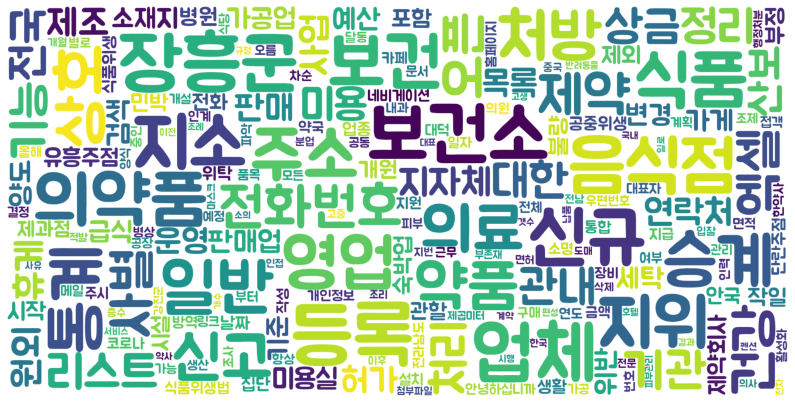

In [ ]:
plt.figure(figsize = (14,10))
plt.rc('font', family='NanumBarunGothic')

wordcloud = WordCloud(font_path = '/content/drive/MyDrive/Colab Notebooks/졸업논문/BMJUA_TTF.TTF',relative_scaling = 0.2,
                      background_color = 'white', width = 2000,
                      height = 1000,  max_font_size = 200).generate_from_frequencies(tfidf_dict2)

plt.imshow(wordcloud)
plt.axis('off')
# plt.title('skip-gram으로 연관성 높은 상위 50개 단어 삭제 후 워드클라우드 ')
plt.show()

### 3. 불용어 처리 추가

In [ ]:
stopwords2 = ['아래', '상상', '제안', '까지', '닷컴', '포털', '사이트', '천만', '오아시스', '이벤트', '접수','서울시','서울','특별시',
             '천만상상','파일','첨부','응모','슬로건','공모','공모전','응모전','신청','경우','때문','정도','사항',
                   '해당','겁니다','이것','저것','그것','돋움','신명', '태명', '한컴', '돋움',
                   '동안','거기','저기','여기','대부분','누구','무엇','고딕','만큼','굴림','감사','건지','텐데',
                   '안녕','이번','걸로','수고','겁니까','그간','그건','그때','글쓴이','누가','니다','다면',
                   '뭔가','상상오아시스','하다','이다','되다','같다','궁','자체','서체','정','서','이','을','있다','없다', '체','관련',
                   '생각', '현재', '진행', '사람', '마음', '남산', '내용', '현실','음','막','김','변','조',
                   '오','참','동','지금','주변','대상','부분','요즘','하루','마련','세대','시간','이상','행위',
                   '활동','구분','사실','과정','모습','기간','선정','단지','자신','발생','지역','기대','마련',
                   '장소','모두','부탁','제공','이용','해주','당시','최근','민원','문제','문제점','현황','개선','방안',
                   '문의','답변','일동','요청','담당자','직원','방법','사용','활용','확인','방식','예전','신규','지소','지위','장흥군','통계',
              '상호', '일반','엑셀','대한','업체','안녕하십니까']

stopwords2.append('자료')
stopwords2.append('정보')
stopwords2.append('공개')
stopwords2.append('청구')
stopwords2.append('정보공개')


In [ ]:
tfidf_vectorizer3 = TfidfVectorizer(analyzer='word',
                             lowercase=False,
                             tokenizer=None,
                             preprocessor=None,
                             min_df=5, # 최소 문서 수 5건
                             ngram_range=(1,1), #Bigram : ngram_range=(1,2)
                             smooth_idf=True,
                             stop_words = stopwords2
                             )

In [ ]:
tfidf_vector3 = tfidf_vectorizer3.fit_transform(nouns_df['nouns'].astype('str')) # tf-idf값으로 채워진 DTM생성
tfidf_scores3 = tfidf_vector3.toarray().sum(axis = 0)
tfidf_idx3 = np.argsort(-tfidf_scores3) # 1차원 배열 거꾸로 정렬 의미
tfidf_scores3 = tfidf_scores3[tfidf_idx3] # 인덱스
tfidf_vocab3 = np.array(tfidf_vectorizer3.get_feature_names())[tfidf_idx3] # 인덱스에 해당하는 단어 추출


In [ ]:
tfidf_df3 = pd.DataFrame({'단어' : tfidf_vocab3, '점수' : tfidf_scores3})

#### 워드 클라우드

In [ ]:
tfidf_dict3 = {}

for i in range(len(tfidf_df3)):
  tfidf_dict3[tfidf_df3.loc[i,'단어']] = tfidf_df3.loc[i,'점수']

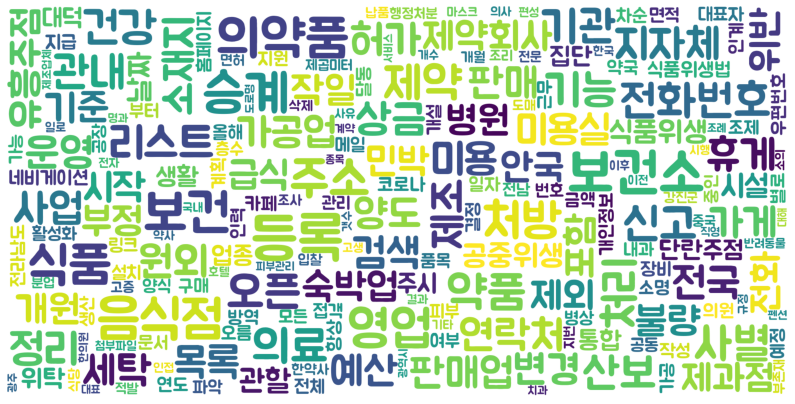

In [ ]:
plt.figure(figsize = (14,10))
plt.rc('font', family='NanumBarunGothic')

wordcloud = WordCloud(font_path = '/content/drive/MyDrive/Colab Notebooks/졸업논문/BMJUA_TTF.TTF',relative_scaling = 0.2,
                      background_color = 'white', width = 2000,
                      height = 1000,  max_font_size = 150).generate_from_frequencies(tfidf_dict3)

plt.imshow(wordcloud)
plt.axis('off')
# plt.title('skip-gram으로 연관성 높은 상위 50개 단어 삭제 후 워드클라우드 ')
plt.show()

### 4. 불용어 처리 추가
- 기본 70개 + 23 + 5

In [ ]:
stopwords3 = ['아래', '상상', '제안', '까지', '닷컴', '포털', '사이트', '천만', '오아시스', '이벤트', '접수','서울시','서울','특별시',
             '천만상상','파일','첨부','응모','슬로건','공모','공모전','응모전','신청','경우','때문','정도','사항',
                   '해당','겁니다','이것','저것','그것','돋움','신명', '태명', '한컴', '돋움',
                   '동안','거기','저기','여기','대부분','누구','무엇','고딕','만큼','굴림','감사','건지','텐데',
                   '안녕','이번','걸로','수고','겁니까','그간','그건','그때','글쓴이','누가','니다','다면',
                   '뭔가','상상오아시스','하다','이다','되다','같다','궁','자체','서체','정','서','이','을','있다','없다', '체','관련',
                   '생각', '현재', '진행', '사람', '마음', '남산', '내용', '현실','음','막','김','변','조',
                   '오','참','동','지금','주변','대상','부분','요즘','하루','마련','세대','시간','이상','행위',
                   '활동','구분','사실','과정','모습','기간','선정','단지','자신','발생','지역','기대','마련',
                   '장소','모두','부탁','제공','이용','해주','당시','최근','민원','문제','문제점','현황','개선','방안',
                   '문의','답변','일동','요청','담당자','직원','방법','사용','활용','확인','방식','예전','신규','지소','지위','장흥군','통계',
              '상호', '일반','엑셀','대한','업체','안녕하십니까','주소','포함','처리','전화번호','연락처','리스트','오픈','등록','산보','원외','사별','보건']

stopwords3.append('자료')
stopwords3.append('정보')
stopwords3.append('공개')
stopwords3.append('청구')
stopwords3.append('정보공개')


In [ ]:
tfidf_vectorizer4 = TfidfVectorizer(analyzer='word',
                             lowercase=False,
                             tokenizer=None,
                             preprocessor=None,
                             min_df=5, # 최소 문서 수 5건
                             ngram_range=(1,1), #Bigram : ngram_range=(1,2)
                             smooth_idf=True,
                             stop_words = stopwords3
                             )

In [ ]:
tfidf_vector4 = tfidf_vectorizer4.fit_transform(nouns_df['nouns'].astype('str')) # tf-idf값으로 채워진 DTM생성
tfidf_scores4 = tfidf_vector4.toarray().sum(axis = 0)
tfidf_idx4 = np.argsort(-tfidf_scores4) # 1차원 배열 거꾸로 정렬 의미
tfidf_scores4 = tfidf_scores4[tfidf_idx4] # 인덱스
tfidf_vocab4 = np.array(tfidf_vectorizer4.get_feature_names())[tfidf_idx4] # 인덱스에 해당하는 단어 추출


In [ ]:
tfidf_df4 = pd.DataFrame({'단어' : tfidf_vocab4, '점수' : tfidf_scores4})

#### 워드클라우드

In [ ]:
tfidf_dict4 = {}

for i in range(len(tfidf_df4)):
  tfidf_dict4[tfidf_df4.loc[i,'단어']] = tfidf_df4.loc[i,'점수']

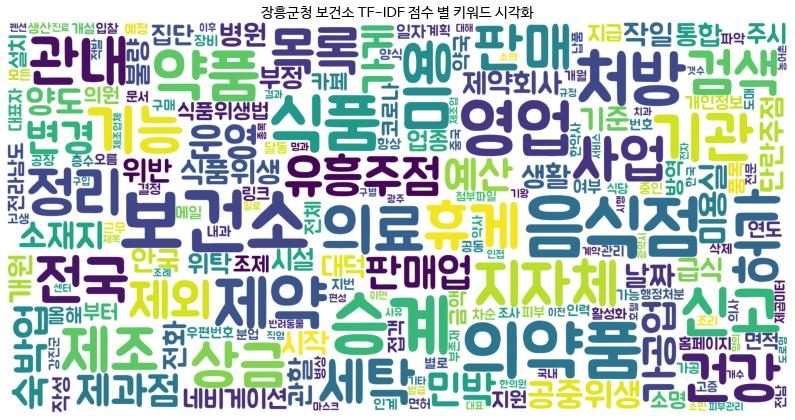

In [ ]:
plt.figure(figsize = (14,10))
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size = 12)

wordcloud = WordCloud(font_path = '/content/drive/MyDrive/Colab Notebooks/졸업논문/BMJUA_TTF.TTF',relative_scaling = 0.2,
                      background_color = 'white', width = 2000,
                      height = 1000,  max_font_size = 200).generate_from_frequencies(tfidf_dict4)

plt.imshow(wordcloud)
plt.axis('off')
plt.title('장흥군청 보건소 TF-IDF 점수 별 키워드 시각화')
plt.show()

- 전체 TF-IDF 에서 선정한 키워드 제외, 점수가 높지만 유의미해 보이지 않는 단어의 경우 임의적으로 불용어로 처리해줌

#### 상위 5개 키워드 살피기

In [ ]:
tfidf_df4[:10]

,단어,점수
0,보건소,59.795460
1,음식점,51.677648
2,승계,45.749137
3,의약품,38.750392
4,식품,33.014694
5,영업,30.917737
6,처방,27.083574
7,제약,25.294467
8,약품,20.212121
9,의료,17.867285


##### 각 키워드의 추이 살피기

## 빈도별 키워드 추출
- TF-IDF와는 불용어 처리 다르게함

### 1차 : 불용어 처리 X

In [ ]:
sentence2 = [[] for i in range(len(sentence))]

for t1 in range(len(sentence)):
  for t2 in sentence[t1]:
    if t2 not in stopwords3:
      sentence2[t1].append(t2)

In [ ]:
all_nouns = []

for t1 in range(len(sentence2)):
  for t2 in sentence2[t1]:
    all_nouns.append(t2)

In [ ]:
all_nouns_set = list(set(all_nouns))

In [ ]:
# 딕셔너리 생성
all_nouns_dict = dict.fromkeys(all_nouns_set,0)

In [ ]:
# 빈도수 카운트 : 청구제목, 청구내용, 공개내용에 한번이라도 들어있으면 OK

for word in all_nouns_dict.keys():
  for i in range(len(data2)):
    if word in data2.loc[i,'청구제목'] or word in data2.loc[i,'청구내용'] or word in data2.loc[i,'공개내용']:
      all_nouns_dict[word] += 1
    else:
      pass


In [ ]:
sorted_all_nouns_dict = dict(sorted(all_nouns_dict.items(), key = lambda item: item[1], reverse = True))

#### 워드클라우드

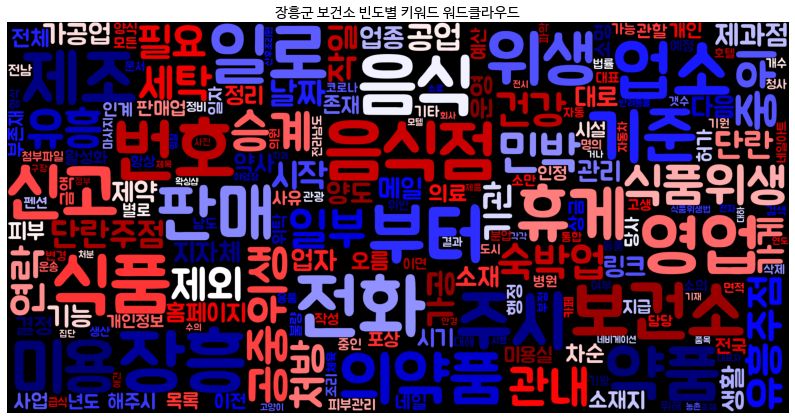

In [ ]:
plt.figure(figsize = (14,10))
plt.rc('font', family='NanumBarunGothic')

wordcloud = WordCloud(font_path = '/content/drive/MyDrive/Colab Notebooks/졸업논문/BMJUA_TTF.TTF',relative_scaling = 0.2,
                      background_color = 'black', width = 2000,
                      height = 1000,  max_font_size = 200,colormap = 'seismic').generate_from_frequencies(sorted_all_nouns_dict)

plt.imshow(wordcloud)
plt.axis('off')
plt.title('장흥군 보건소 빈도별 키워드 워드클라우드')
plt.show()

### 1차 불용어 처리후 진행
- stopword 

In [ ]:
all_nouns_set2 = [word for word in all_nouns_set if word not in stopwords]

In [ ]:
# 딕셔너리 생성
all_nouns_dict2 = dict.fromkeys(all_nouns_set2,0)

# 빈도수 카운트 : 청구제목, 청구내용, 공개내용에 한번이라도 들어있으면 OK

for word in all_nouns_dict2.keys():
  for i in range(len(data2)):
    if word in data2.loc[i,'청구제목'] or word in data2.loc[i,'청구내용'] or word in data2.loc[i,'공개내용']:
      all_nouns_dict2[word] += 1
    else:
      pass

sorted_all_nouns_dict2 = dict(sorted(all_nouns_dict2.items(), key = lambda item: item[1], reverse = True))

In [ ]:
sorted_all_nouns_df2 = pd.DataFrame({'단어': sorted_all_nouns_dict2.keys(), '빈도': sorted_all_nouns_dict2.values()})

In [ ]:
sorted_all_nouns_df2[:20]

,단어,빈도
0,전화,134
1,장흥,131
2,번호,112
3,식품,105
4,음식,101
5,음식점,98
6,일로,94
7,영업,93
8,부터,91
9,업소,85


### 2차 불용어 처리후 진행
- stopword + '전화' ,'장흥', '번호', '일로', '부터', '주시', '중위', '관내', '일부', '제외', '연락','작일','시작','메일','전체','오름','개인','부존재

In [ ]:
stopwords4 = ['아래', '상상', '제안', '까지', '닷컴', '포털', '사이트', '천만', '오아시스', '이벤트', '접수','서울시','서울','특별시',
             '천만상상','파일','첨부','응모','슬로건','공모','공모전','응모전','신청','경우','때문','정도','사항',
                   '해당','겁니다','이것','저것','그것','돋움','신명', '태명', '한컴', '돋움',
                   '동안','거기','저기','여기','대부분','누구','무엇','고딕','만큼','굴림','감사','건지','텐데',
                   '안녕','이번','걸로','수고','겁니까','그간','그건','그때','글쓴이','누가','니다','다면',
                   '뭔가','상상오아시스','하다','이다','되다','같다','궁','자체','서체','정','서','이','을','있다','없다', '체','관련',
                   '생각', '현재', '진행', '사람', '마음', '남산', '내용', '현실','음','막','김','변','조',
                   '오','참','동','지금','주변','대상','부분','요즘','하루','마련','세대','시간','이상','행위',
                   '활동','구분','사실','과정','모습','기간','선정','단지','자신','발생','지역','기대','마련',
                   '장소','모두','부탁','제공','이용','해주','당시','최근','민원','문제','문제점','현황','개선','방안',
                   '문의','답변','일동','요청','담당자','직원','방법','사용','활용','확인','방식','예전','자료','정보','공개','청구','정보공개',
              '전화' ,'장흥', '번호', '일로', '부터', '주시', '중위', '관내', '일부', '제외', '연락','작일','시작','메일','전체','오름','개인','부존재']

In [ ]:
all_nouns_set3 = [word for word in all_nouns_set if word not in stopwords4]

In [ ]:
# 딕셔너리 생성
all_nouns_dict3 = dict.fromkeys(all_nouns_set3,0)

# 빈도수 카운트 : 청구제목, 청구내용, 공개내용에 한번이라도 들어있으면 OK

for word in all_nouns_dict3.keys():
  for i in range(len(data2)):
    if word in data2.loc[i,'청구제목'] or word in data2.loc[i,'청구내용'] or word in data2.loc[i,'공개내용']:
      all_nouns_dict3[word] += 1
    else:
      pass

sorted_all_nouns_dict3 = dict(sorted(all_nouns_dict3.items(), key = lambda item: item[1], reverse = True))

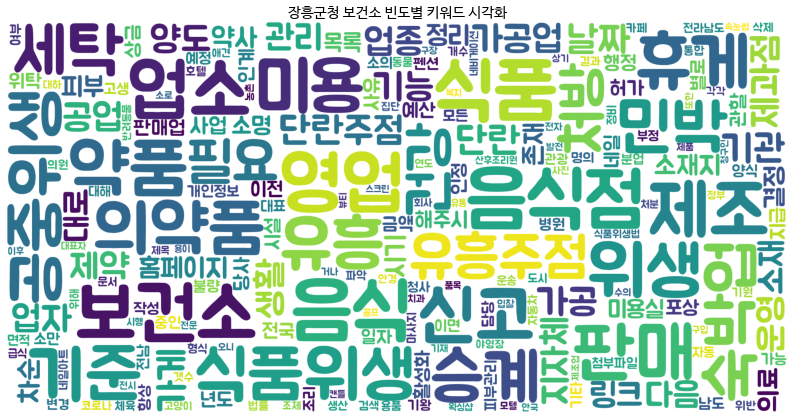

In [ ]:
plt.figure(figsize = (14,10))
plt.rc('font', family='NanumBarunGothic')

wordcloud = WordCloud(font_path = '/content/drive/MyDrive/Colab Notebooks/졸업논문/BMJUA_TTF.TTF',relative_scaling = 0.2,
                      background_color = 'white', width = 2000,
                      height = 1000,  max_font_size = 200).generate_from_frequencies(sorted_all_nouns_dict3)

plt.imshow(wordcloud)
plt.axis('off')
plt.rc('font', size=12)
plt.title('장흥군청 보건소 빈도별 키워드 시각화')
plt.show()